In [155]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

sns.set()
sns.set_style("whitegrid")

In [2]:
import os

In [69]:
data_file = "data/TADPOLE_D1_D2.csv"
merge_data = pd.read_csv(data_file, na_values="")



/home/moyde/Documents/Studies/Chalmers/Thesis/LIPTraAD/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (471,473,474,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,569,570,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,599,601,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,71

In [70]:
merge_data

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,2006-03-13,AD,...,,,,,,,,,,
3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,2006-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,2007-09-12,AD,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,4167,116_S_4167,m60,116,1,1,ADNI2,ADNI2,2016-11-16,LMCI,...,,,,,,,,,,
12737,4199,116_S_4199,m60,116,1,1,ADNI2,ADNI2,2016-12-12,EMCI,...,,,,,,,,,,
12738,4557,053_S_4557,m60,53,1,1,ADNI2,ADNI2,2017-03-15,EMCI,...,,,,,,,,,,
12739,4512,100_S_4512,m48,100,1,1,ADNI2,ADNI2,2017-04-04,EMCI,...,,,,,,,,,,


In [71]:
print(merge_data.shape)

(12741, 1907)


In [72]:
totno_subjects = merge_data["RID"].nunique()
totno_subjects

1737

In [73]:
#how many patients at each checkup
# merge_data.groupby("VISCODE")["RID"].nunique().sort_values()
# This returns a df whereas nunique returns a series
no_measurements_per_tp = merge_data.groupby(by='VISCODE', as_index=False).agg({'RID': pd.Series.nunique})


In [152]:
features = ['CDRSB',
'ADAS11',
'ADAS13',
'MMSE',
'RAVLT_immediate',
'RAVLT_learning',
'RAVLT_forgetting',
'RAVLT_perc_forgetting',
'MOCA',
'FAQ',
'Entorhinal',
'Fusiform',
'Hippocampus',
'ICV',
'MidTemp',
'Ventricles',
'WholeBrain',
'AV45',
'FDG',
'ABETA_UPENNBIOMK9_04_19_17',
'TAU_UPENNBIOMK9_04_19_17',
'PTAU_UPENNBIOMK9_04_19_17']
ptau = merge_data[['RID', 'M']+features]
ptau[['MOCA','FAQ','Entorhinal','Fusiform']].head(15)
ptau

,RID,M,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,...,Hippocampus,ICV,MidTemp,Ventricles,WholeBrain,AV45,FDG,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17
0,2,0,0.0,10.67,18.67,28.0,44.0,4.0,6.0,54.5455,...,8336.0,1984660.0,27936.0,118233.0,1229740.0,NaN,1.36926,,,
1,3,0,4.5,22.00,31.00,20.0,22.0,1.0,4.0,100.0000,...,5319.0,1920690.0,18422.0,84599.0,1129830.0,NaN,1.09079,741.5,239.7,22.83
2,3,6,6.0,19.00,30.00,24.0,19.0,2.0,6.0,100.0000,...,5446.0,1906430.0,16972.0,88580.0,1100060.0,NaN,1.06360,,,
3,3,12,3.5,24.00,35.00,17.0,31.0,2.0,7.0,100.0000,...,5157.0,1903820.0,17330.0,90099.0,1095640.0,NaN,1.10384,601.4,251.7,24.18
4,3,24,8.0,25.67,37.67,19.0,23.0,1.0,5.0,100.0000,...,5139.0,1903420.0,16398.0,97420.0,1088560.0,NaN,1.03871,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,4167,60,NaN,37.00,NaN,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
12737,4199,60,1.0,10.00,12.00,27.0,38.0,3.0,5.0,50.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
12738,4557,60,NaN,15.00,22.00,27.0,29.0,2.0,7.0,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
12739,4512,48,0.5,5.00,7.00,28.0,38.0,3.0,1.0,11.1111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,


In [153]:
#Select the feature you want to plot and add it to the columns below
value = "PTAU_UPENNBIOMK9_04_19_17"
#Rename your column so the operations done below can be generalized
#ptau.rename({"FDG" : "FEATURE"}, axis=1, inplace=True)
ptau = ptau.replace(r'^\s+$', np.nan, regex=True)
#ptau = ptau.dropna(subset=features)
np.genfromtxt(ptau)
# try:
#     ptau[features] = ptau[features].astype("float")
# except ValueError:
#     print("Value Error")

ptau = ptau.groupby(by='M', as_index=False).count()
#Cast to int
ptau = ptau.sort_values(by=["M"])

ptau.loc[:,features] = ptau.loc[:,features].div(ptau.RID.values, axis=0) *100
ptau = ptau.round(1)
ptau = ptau.head(10)
ptau

,M,RID,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,...,Hippocampus,ICV,MidTemp,Ventricles,WholeBrain,AV45,FDG,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17
0,0,1737,100.0,99.7,99.2,100.0,99.7,99.7,99.7,99.4,...,85.7,99.1,84.4,95.3,97.2,51.5,75.0,69.9,69.9,69.9
1,3,793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.2,97.1,82.6,88.9,93.4,0.0,0.0,0.0,0.0,0.0
2,6,1618,99.2,99.6,98.6,99.8,99.3,99.3,99.3,98.7,...,76.1,88.8,74.0,84.2,86.5,0.0,22.7,0.1,0.1,0.1
3,12,1485,98.2,98.9,98.2,99.2,98.5,98.5,98.2,97.4,...,80.0,93.7,75.2,87.8,90.4,0.3,22.8,21.5,21.5,21.5
4,18,1293,25.1,25.4,25.4,25.4,25.2,25.2,25.2,25.2,...,17.9,22.8,17.9,22.2,22.5,0.0,11.9,0.1,0.1,0.1
5,24,1326,96.8,97.1,95.7,97.4,95.9,95.9,95.3,93.7,...,73.7,84.8,65.2,77.1,80.5,42.1,49.8,33.4,33.4,33.4
6,30,750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.3
7,36,853,95.2,95.3,93.7,95.7,93.9,93.9,93.2,92.7,...,42.8,53.3,40.9,49.5,51.0,3.0,22.3,9.6,9.6,9.6
8,42,307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,48,659,95.0,96.1,95.1,96.2,94.5,94.5,94.1,93.5,...,46.0,51.7,41.6,46.3,49.6,49.2,18.5,27.8,27.8,27.6


In [156]:
print(tabulate(ptau, headers="keys", tablefmt="latex_raw"))

\begin{tabular}{rrrrrrrrrrrrrrrrrrrrrrrrr}
\hline
    &   M &   RID &   CDRSB &   ADAS11 &   ADAS13 &   MMSE &   RAVLT_immediate &   RAVLT_learning &   RAVLT_forgetting &   RAVLT_perc_forgetting &   MOCA &   FAQ &   Entorhinal &   Fusiform &   Hippocampus &   ICV &   MidTemp &   Ventricles &   WholeBrain &   AV45 &   FDG &   ABETA_UPENNBIOMK9_04_19_17 &   TAU_UPENNBIOMK9_04_19_17 &   PTAU_UPENNBIOMK9_04_19_17 \\
\hline
  0 &   0 &  1737 &   100   &     99.7 &     99.2 &  100   &              99.7 &             99.7 &               99.7 &                    99.4 &   52.1 &  99.5 &         84.4 &       84.4 &          85.7 &  99.1 &      84.4 &         95.3 &         97.2 &   51.5 &  75   &                         69.9 &                       69.9 &                        69.9 \\
  1 &   3 &   793 &     0   &      0   &      0   &    0   &               0   &              0   &                0   &                     0   &    0   &   0   &         82.6 &       82.6 &          85.2 &  97

[(0.0, 102.0)]

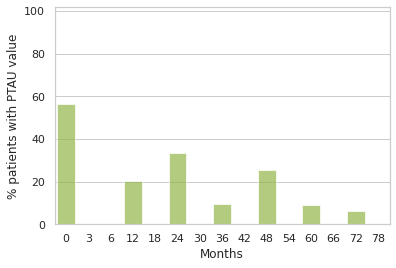

In [67]:
colors = sns.cubehelix_palette(n_colors = 10, start=2.8, rot=-.4, dark=0.25, light=.75, reverse=True)
ax = sns.barplot(x="VISCODE", y ="FEATURE", data = ptau,color="yellowgreen", saturation=0.7, alpha=0.7)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, horizontalalignment='right')
ax.set(xlabel="Months", ylabel="% patients with {} value".format(value))
ax.set(ylim=(0,102))

In [68]:

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/data_stats/{}.png".format(value))